In [ ]:
himport pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.utils import resample

In [ ]:
df = pd.read_csv("hf://datasets/Naat97/financial-risk-data/financial_risk_analysis_large.csv")
df.rename(columns={'LoanApproved': 'Risk'}, inplace=True)
df['Risk'] = df['Risk'].replace({1: 'Low Risk', 0: 'High Risk'})

In [ ]:
minority = df[df['Risk'] == 'Low Risk']
majority = df[df['Risk'] == 'High Risk']

majority_down = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=42
)

df = pd.concat([majority_down, minority])
df.shape

(746338, 51)

In [ ]:
X= df.drop('Risk', axis=1)
Y = df['Risk']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30, stratify=Y)

In [ ]:
num_features = X_train.select_dtypes(include=['number']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)


pipe = Pipeline([
    ('preprocess', preprocessor)
])

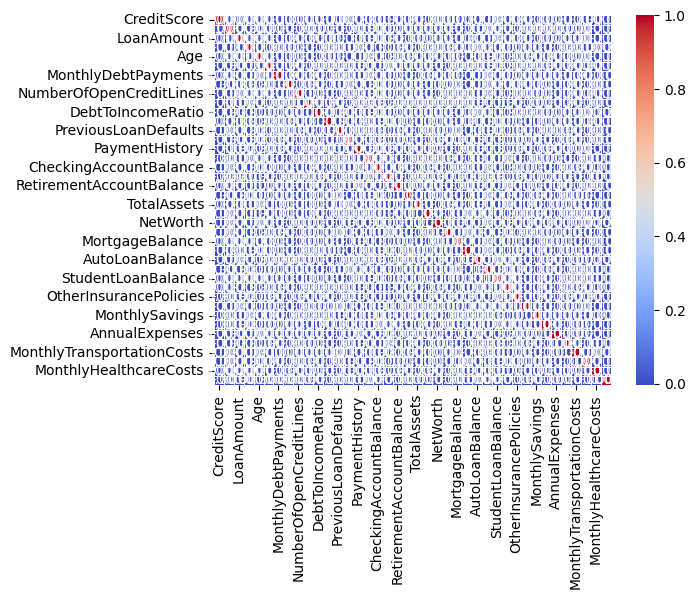

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.show()

As We can see Above The Features aren't that correlated to each other that's why we can't use PCA.

In [ ]:
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [ ]:
model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [ ]:
print('accuracy_score ->',accuracy_score(Y_test, Y_pred))
print('classification_report ->',classification_report(Y_test, Y_pred))
print('confusion_matrix ->',confusion_matrix(Y_test, Y_pred))

accuracy_score -> 0.8013818545613706
classification_report ->               precision    recall  f1-score   support

   High Risk       1.00      0.60      0.75    111951
    Low Risk       0.72      1.00      0.83    111951

    accuracy                           0.80    223902
   macro avg       0.86      0.80      0.79    223902
weighted avg       0.86      0.80      0.79    223902

confusion_matrix -> [[ 67482  44469]
 [     2 111949]]
